  **Assignment 5**

  Aim: Perform multiclass classification on Stanford Dog dataset.



In [ ]:
# import libraries
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
# prepare train and test data generator

data_gen = ImageDataGenerator(rescale = 1./255)

train_data = data_gen.flow_from_directory(
    'Train/',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

test_data = data_gen.flow_from_directory(
    'Test/',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
)

Found 801 images belonging to 5 classes.
Found 199 images belonging to 5 classes.


In [ ]:
test_data.class_indices

{'n02085620-Chihuahua': 0,
 'n02085782-Japanese_spaniel': 1,
 'n02085936-Maltese_dog': 2,
 'n02110185-Siberian_husky': 3,
 'n02112018-Pomeranian': 4}

In [ ]:
# build model

model = Sequential([
    Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.4),
    Dense(5,activation='softmax')
])

model.summary()

C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,266,885 (73.50 MB)

 Trainable params: 19,266,373 (73.50 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
# compile model

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model

model.fit(train_data,
          epochs=10,
          batch_size=100,
          validation_data=test_data,
)

Epoch 1/10


C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 704ms/step - accuracy: 0.2616 - loss: 1.7202 - val_accuracy: 0.3618 - val_loss: 1.5941
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 730ms/step - accuracy: 0.6512 - loss: 0.9975 - val_accuracy: 0.3970 - val_loss: 1.5775
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 744ms/step - accuracy: 0.7746 - loss: 0.6389 - val_accuracy: 0.4824 - val_loss: 1.5590
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 798ms/step - accuracy: 0.8504 - loss: 0.4416 - val_accuracy: 0.3518 - val_loss: 1.5423
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 767ms/step - accuracy: 0.8965 - loss: 0.3355 - val_accuracy: 0.4925 - val_loss: 1.5049
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 744ms/step - accuracy: 0.9383 - loss: 0.2090 - val_accuracy: 0.4020 - val_loss: 1.5014
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 754ms/step - accuracy: 0.9562 - loss: 0.1505 - val_accuracy: 0.4673 - val_loss: 1.4530
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 746ms/step - accuracy: 0.9842 - loss: 0.0862 - val_accuracy: 0.502

In [ ]:
train_loss, train_accuracy = model.evaluate(train_data)

print("Train Loss : ", train_loss*100)
print("Train Accuracy : ", train_accuracy*100)

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.9978 - loss: 0.8677
Train Loss :  85.62045097351074
Train Accuracy :  99.75031018257141


In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, steps=test_data.samples // test_data.batch_size)

print("Test Loss : ", test_loss * 100)
print("Test Accuracy : ", test_accuracy * 100)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.5022 - loss: 1.3436
Test Loss :  135.91251373291016
Test Accuracy :  48.4375


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.0000000e+00 1.0000000e+00 0.0000000e+00 4.9319094e-30 0.0000000e+00]]
Predicted class: Japanese_spaniel


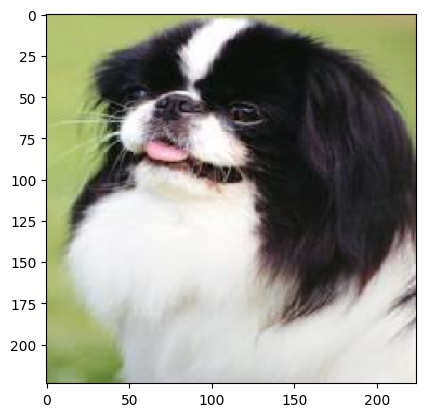

In [ ]:
# predict

dir = [
        'n02085620-Chihuahua',
        'n02085782-Japanese_spaniel',
        'n02085936-Maltese_dog',
        'n02110185-Siberian_husky',
        'n02112018-Pomeranian'
        ]

image_dir = random.choice(dir)
image_path = 'Test/' + image_dir

# List all image files in the directory
image_files = [os.path.join(image_path, f) for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

#  selecting random image in directory
random_img_path = random.choice(image_files)

plt.imshow(image.load_img(random_img_path,target_size=(224,224)))

# Load the random image for prediction
img = image.load_img(random_img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size

# Predict the image
predictions = model.predict(img_array)
print(predictions)

# Convert prediction to class label
predicted_index = np.argmax(predictions[0])

# Define the class labels
class_labels = [
    'Chihuahua',
    'Japanese_spaniel',
    'Maltese_dog',
    'Siberian_husky',
    'Pomeranian',
]

# Get the class label with the highest prediction value
class_label = class_labels[predicted_index]

print("Predicted class:", class_label)